# Unet_Train

Training a UNET with basic paramters:

* input_h,iput_w = 450,450
* classes = 2
* targets = train_y, eval_y


In [ ]:
import keras
import sys
import matplotlib
import numpy as np
import time
import matplotlib.pyplot as plt
import os

sys.path.append('../')

from datasets import CD_Dataset
from models import Unet
from utility import show_batches, from_categorical, train, crop_receptive, predict_full_image
from utility import dice, precision, Pc
from datasets import combine_y_w

seed = int((time.time()*1e6)%1e6)
np.random.seed(seed)
keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=seed)

In [46]:
input_patch_size = [450,450] # input patch (expect output to be smaller)
input_channels = [3] # RGB
output_channels = [2] #cell and bkg
NBATCH = 5 # example patch per batch
EPCS = 300 # epochs
REG = True # regularization
USEW = True # use weights
W = 10 # importance of weights
NAME_NET = 'Unet_W100' # name for saving
JT = True # Just train set means no evaluation during training 

dataset_path = '../CD_Dataset'
trained_models_path = './trained_models'
NAME_NET = os.path.join(trained_models_path,NAME_NET)

In [3]:
# Load the dataset
dataset = CD_Dataset( path=dataset_path, 
                     train_y_path="train_y",  
                     eval_y_path="eval_y", 
                     fit=True, 
                     download=True, 
                     num_classes=output_channels[0] )


('mean_features: ', array([ 0.86503507,  0.83272585,  0.72929356]))
('std_features: ', array([ 0.01255889,  0.01785996,  0.05625756]))


In [7]:
# define your model
model_input_size = input_patch_size + input_channels
unet = Unet(model_input_size, classes=output_channels[0], regularized=REG)
model_output_size = list(unet.outputs_shape[0])
print("input size: {}\noutput_size: {}".format(model_input_size,model_output_size))

input size: [450, 450, 3]
output_size: [260, 260, 2]


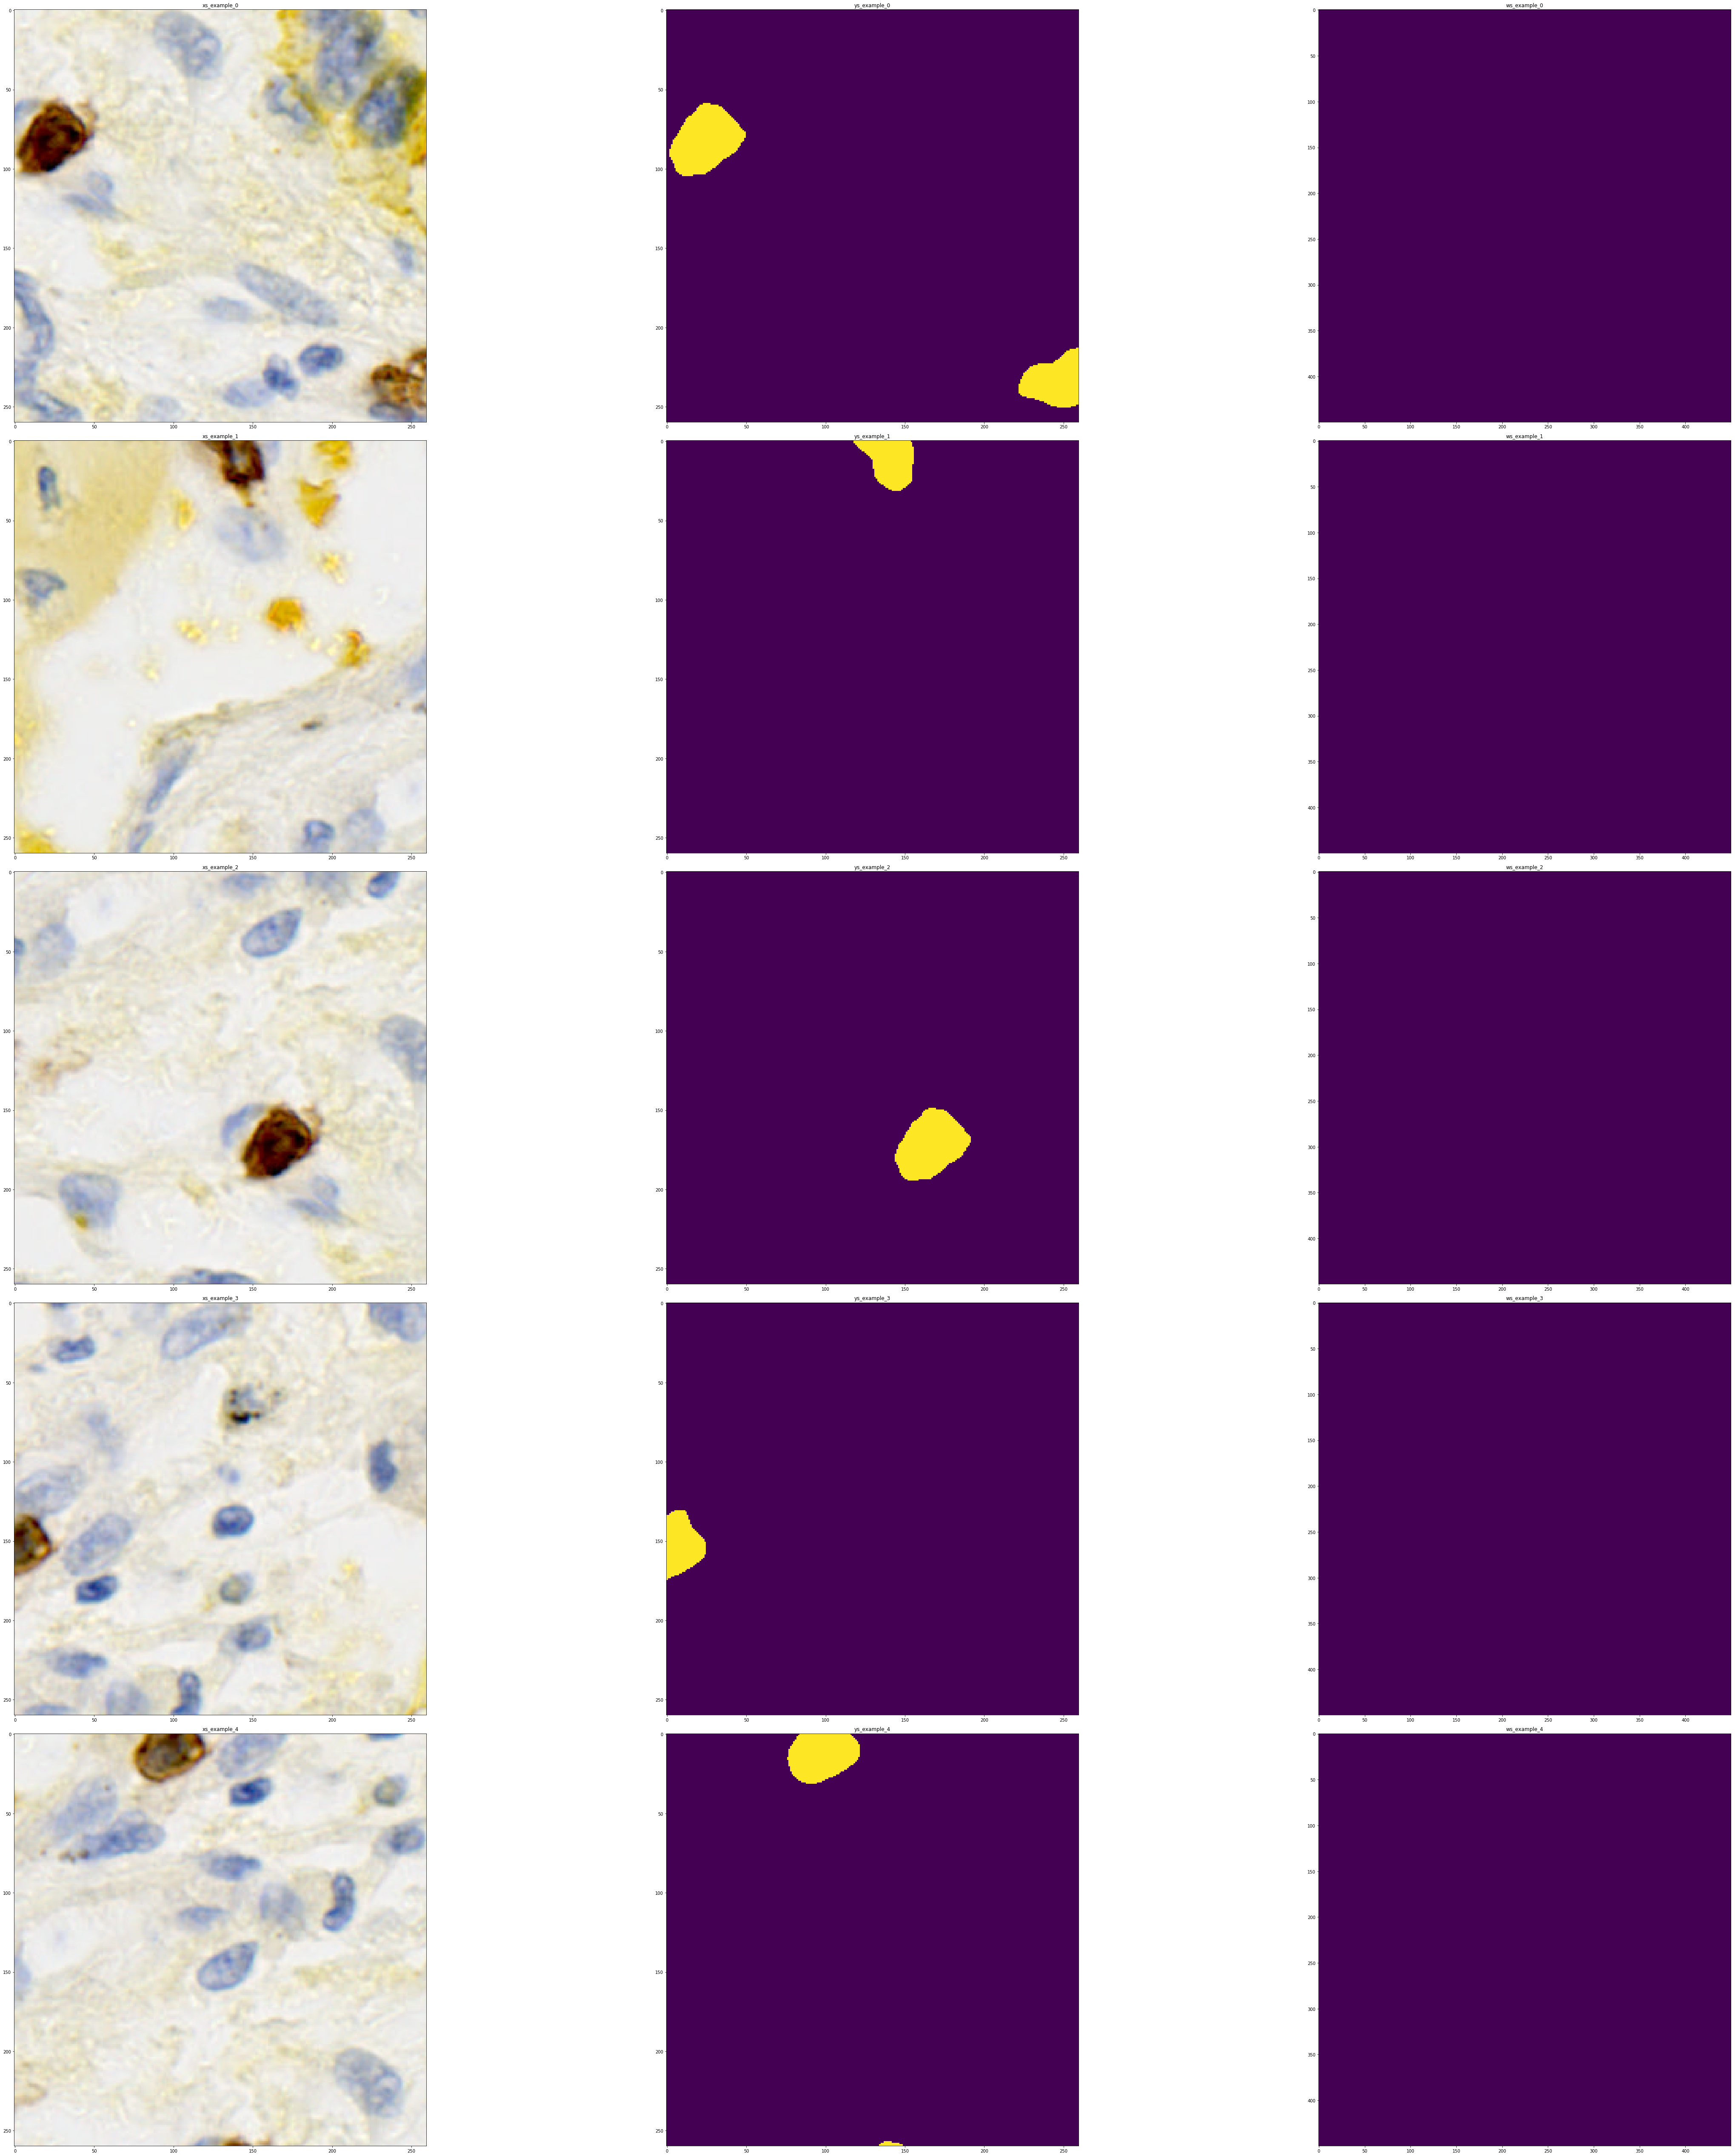

In [9]:
# Visualize some data
means = dataset.mean_features()
stds = dataset.std_features()
xs,ys,ws= dataset.sample_X_Y_W_patch_batch(input_patch_size,n_batch=5,fit=False, rotate=False)
xs_c = crop_receptive(xs,model_output_size[:2])
ys_c = crop_receptive(ys,model_output_size[:2])
ws_c = crop_receptive(np.expand_dims(ws,3),model_output_size[:2])
ys_imgs_c = from_categorical(ys_c)
show_batches([xs_c,ys_imgs_c,ws],["xs","ys","ws"])

In [47]:
# Train your model
histo = train(unet,dataset,n_batch=NBATCH,epochs=EPCS,just_train=JT,use_weights=USEW, W=W, name=NAME_NET)

=========== iteration 1/300 =============
Epoch 1/1
10/10 [==============================] - 2s 164ms/step
=========== iteration 2/300 =============
Epoch 1/1
10/10 [==============================] - 1s 133ms/step
=========== iteration 3/300 =============
Epoch 1/1
10/10 [==============================] - 1s 133ms/step
=========== iteration 4/300 =============
Epoch 1/1
10/10 [==============================] - 1s 134ms/step
=========== iteration 5/300 =============
Epoch 1/1
10/10 [==============================] - 1s 132ms/step
=========== iteration 6/300 =============
Epoch 1/1
10/10 [==============================] - 1s 133ms/step
=========== iteration 7/300 =============
Epoch 1/1
10/10 [==============================] - 1s 133ms/step
=========== iteration 8/300 =============
Epoch 1/1
10/10 [==============================] - 1s 135ms/step
=========== iteration 9/300 =============
Epoch 1/1
10/10 [==============================] - 1s 134ms/step
=========== iteration 10/300 ========

10/10 [==============================] - 1s 134ms/step
=========== iteration 35/300 =============
Epoch 1/1
10/10 [==============================] - 1s 134ms/step
=========== iteration 36/300 =============
Epoch 1/1
10/10 [==============================] - 1s 135ms/step
=========== iteration 37/300 =============
Epoch 1/1
10/10 [==============================] - 1s 145ms/step
=========== iteration 38/300 =============
Epoch 1/1
10/10 [==============================] - 1s 135ms/step
=========== iteration 39/300 =============
Epoch 1/1
10/10 [==============================] - 1s 135ms/step
=========== iteration 40/300 =============
saving model: Unet_W100
Saved model to disk
Epoch 1/1
10/10 [==============================] - 1s 134ms/step
=========== iteration 41/300 =============
Epoch 1/1
10/10 [==============================] - 1s 135ms/step
=========== iteration 42/300 =============
Epoch 1/1
10/10 [==============================] - 1s 135ms/step
=========== iteration 43/300 ========

10/10 [==============================] - 1s 139ms/step
=========== iteration 69/300 =============
Epoch 1/1
10/10 [==============================] - 1s 134ms/step
=========== iteration 70/300 =============
saving model: Unet_W100
Saved model to disk
Epoch 1/1
10/10 [==============================] - 1s 134ms/step
=========== iteration 71/300 =============
Epoch 1/1
10/10 [==============================] - 1s 135ms/step
=========== iteration 72/300 =============
Epoch 1/1
10/10 [==============================] - 1s 135ms/step
=========== iteration 73/300 =============
Epoch 1/1
10/10 [==============================] - 1s 135ms/step
=========== iteration 74/300 =============
Epoch 1/1
10/10 [==============================] - 1s 135ms/step
=========== iteration 75/300 =============
Epoch 1/1
10/10 [==============================] - 1s 142ms/step
=========== iteration 76/300 =============
Epoch 1/1
10/10 [==============================] - 1s 135ms/step
=========== iteration 77/300 ========

10/10 [==============================] - 1s 145ms/step
=========== iteration 102/300 =============
Epoch 1/1
10/10 [==============================] - 1s 134ms/step
=========== iteration 103/300 =============
Epoch 1/1
10/10 [==============================] - 1s 134ms/step
=========== iteration 104/300 =============
Epoch 1/1
10/10 [==============================] - 1s 134ms/step
=========== iteration 105/300 =============
Epoch 1/1
10/10 [==============================] - 1s 135ms/step
=========== iteration 106/300 =============
Epoch 1/1
10/10 [==============================] - 1s 135ms/step
=========== iteration 107/300 =============
Epoch 1/1
10/10 [==============================] - 1s 135ms/step
=========== iteration 108/300 =============
Epoch 1/1
10/10 [==============================] - 1s 135ms/step
=========== iteration 109/300 =============
Epoch 1/1
10/10 [==============================] - 1s 135ms/step
=========== iteration 110/300 =============
saving model: Unet_W100
Saved

10/10 [==============================] - 1s 135ms/step
=========== iteration 136/300 =============
Epoch 1/1
10/10 [==============================] - 1s 134ms/step
=========== iteration 137/300 =============
Epoch 1/1
10/10 [==============================] - 1s 134ms/step
=========== iteration 138/300 =============
Epoch 1/1
10/10 [==============================] - 1s 145ms/step
=========== iteration 139/300 =============
Epoch 1/1
10/10 [==============================] - 1s 134ms/step
=========== iteration 140/300 =============
saving model: Unet_W100
Saved model to disk
Epoch 1/1
10/10 [==============================] - 1s 135ms/step
=========== iteration 141/300 =============
Epoch 1/1
10/10 [==============================] - 1s 134ms/step
=========== iteration 142/300 =============
Epoch 1/1
10/10 [==============================] - 1s 135ms/step
=========== iteration 143/300 =============
Epoch 1/1
10/10 [==============================] - 1s 134ms/step
=========== iteration 144/300

10/10 [==============================] - 1s 135ms/step
=========== iteration 169/300 =============
Epoch 1/1
10/10 [==============================] - 1s 135ms/step
=========== iteration 170/300 =============
saving model: Unet_W100
Saved model to disk
Epoch 1/1
10/10 [==============================] - 1s 135ms/step
=========== iteration 171/300 =============
Epoch 1/1
10/10 [==============================] - 1s 135ms/step
=========== iteration 172/300 =============
Epoch 1/1
10/10 [==============================] - 1s 135ms/step
=========== iteration 173/300 =============
Epoch 1/1
10/10 [==============================] - 1s 138ms/step
=========== iteration 174/300 =============
Epoch 1/1
10/10 [==============================] - 1s 135ms/step
=========== iteration 175/300 =============
Epoch 1/1
10/10 [==============================] - 1s 135ms/step
=========== iteration 176/300 =============
Epoch 1/1
10/10 [==============================] - 1s 135ms/step
=========== iteration 177/300

Epoch 1/1
10/10 [==============================] - 1s 135ms/step
=========== iteration 203/300 =============
Epoch 1/1
10/10 [==============================] - 1s 146ms/step
=========== iteration 204/300 =============
Epoch 1/1
10/10 [==============================] - 1s 135ms/step
=========== iteration 205/300 =============
Epoch 1/1
10/10 [==============================] - 1s 135ms/step
=========== iteration 206/300 =============
Epoch 1/1
10/10 [==============================] - 1s 134ms/step
=========== iteration 207/300 =============
Epoch 1/1
10/10 [==============================] - 1s 134ms/step
=========== iteration 208/300 =============
Epoch 1/1
10/10 [==============================] - 1s 134ms/step
=========== iteration 209/300 =============
Epoch 1/1
10/10 [==============================] - 1s 134ms/step
=========== iteration 210/300 =============
saving model: Unet_W100
Saved model to disk
Epoch 1/1
10/10 [==============================] - 1s 145ms/step
=========== iterati

10/10 [==============================] - 1s 135ms/step
=========== iteration 236/300 =============
Epoch 1/1
10/10 [==============================] - 1s 135ms/step
=========== iteration 237/300 =============
Epoch 1/1
10/10 [==============================] - 1s 135ms/step
=========== iteration 238/300 =============
Epoch 1/1
10/10 [==============================] - 1s 135ms/step
=========== iteration 239/300 =============
Epoch 1/1
10/10 [==============================] - 1s 138ms/step
=========== iteration 240/300 =============
saving model: Unet_W100
Saved model to disk
Epoch 1/1
10/10 [==============================] - 1s 135ms/step
=========== iteration 241/300 =============
Epoch 1/1
10/10 [==============================] - 1s 134ms/step
=========== iteration 242/300 =============
Epoch 1/1
10/10 [==============================] - 1s 134ms/step
=========== iteration 243/300 =============
Epoch 1/1
10/10 [==============================] - 1s 134ms/step
=========== iteration 244/300

10/10 [==============================] - 1s 135ms/step
=========== iteration 270/300 =============
saving model: Unet_W100
Saved model to disk
Epoch 1/1
10/10 [==============================] - 1s 139ms/step
=========== iteration 271/300 =============
Epoch 1/1
10/10 [==============================] - 1s 135ms/step
=========== iteration 272/300 =============
Epoch 1/1
10/10 [==============================] - 1s 134ms/step
=========== iteration 273/300 =============
Epoch 1/1
10/10 [==============================] - 1s 135ms/step
=========== iteration 274/300 =============
Epoch 1/1
10/10 [==============================] - 1s 135ms/step
=========== iteration 275/300 =============
Epoch 1/1
10/10 [==============================] - 1s 135ms/step
=========== iteration 276/300 =============
Epoch 1/1
10/10 [==============================] - 1s 134ms/step
=========== iteration 277/300 =============
Epoch 1/1
10/10 [==============================] - 1s 145ms/step
=========== iteration 278/300

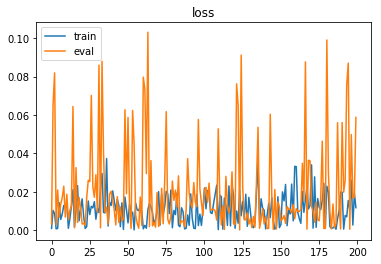

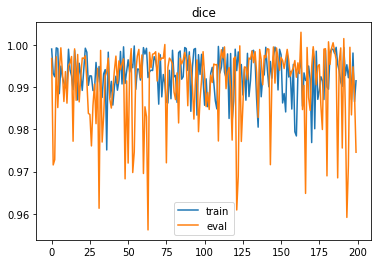

In [42]:
train_histo,eval_histo=histo
train_histo = np.array(train_histo)
eval_histo = np.array(eval_histo)

train_p, = plt.plot(train_histo[:,1], label='train')
plots = [train_p]
if eval_histo.shape > 0:
    eval_p, = plt.plot(eval_histo[:,2], label='eval')
    plots += [eval_p]
plt.title('loss')
plt.legend(handles=plots)
plt.show()

train_p, = plt.plot(train_histo[:,2], label='train')
plots = [train_p]
if eval_histo.shape > 0:
    eval_p, = plt.plot(eval_histo[:,1], label='eval')
    plots += [eval_p]
plt.title('dice')
plt.legend(handles=plots)
plt.show()

In [50]:
# Save model
unet.save_model(NAME_NET)
eval_histo = np.array(histo[0])
train_histo = np.array(histo[1])
train_histo.dump(NAME_NET+'_train_histo.pkl')
eval_histo.dump(NAME_NET+'_eval_histo.pkl')

Saved model to disk


In [7]:
!ls -l --block-size=M 

total 364M
-rw-rw-r-- 1 ubuntu ubuntu   1M Jan 27 19:02 Evaluation.ipynb
-rw-rw-r-- 1 ubuntu ubuntu   8M Jan 30 08:58 Training.ipynb
-rw-rw-r-- 1 ubuntu ubuntu 119M Jan 27 20:19 Unet_Train_1.h5
-rw-rw-r-- 1 ubuntu ubuntu   1M Jan 27 20:19 Unet_Train_1.json
-rw-rw-r-- 1 ubuntu ubuntu   1M Jan 27 20:19 Unet_Train_1_eval_histo.pkl
-rw-rw-r-- 1 ubuntu ubuntu   1M Jan 27 20:19 Unet_Train_1_train_histo.pkl
-rw-rw-r-- 1 ubuntu ubuntu 119M Jan 30 08:58 Unet_Train_2.h5
-rw-rw-r-- 1 ubuntu ubuntu   1M Jan 30 08:58 Unet_Train_2.json
-rw-rw-r-- 1 ubuntu ubuntu   1M Jan 30 08:58 Unet_Train_2_eval_histo.pkl
-rw-rw-r-- 1 ubuntu ubuntu   1M Jan 30 08:58 Unet_Train_2_train_histo.pkl
-rw-rw-r-- 1 ubuntu ubuntu 119M Jan 27 18:29 test_yw.h5
-rw-rw-r-- 1 ubuntu ubuntu   1M Jan 27 18:29 test_yw.json


In [51]:
# Load model
unet = Unet(model_input_size, classes=output_channels[0], regularized=REG)
unet.load_model(NAME_NET)
train_histo = np.load(NAME_NET+'_train_histo.pkl')
eval_histo = np.load(NAME_NET+'_eval_histo.pkl')

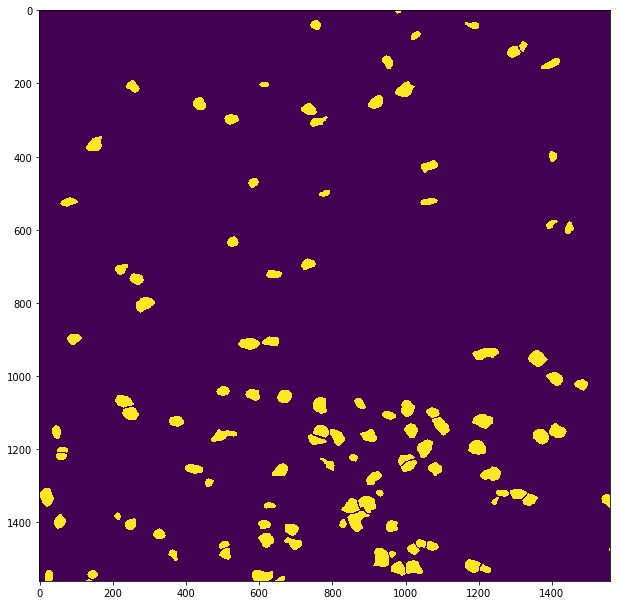

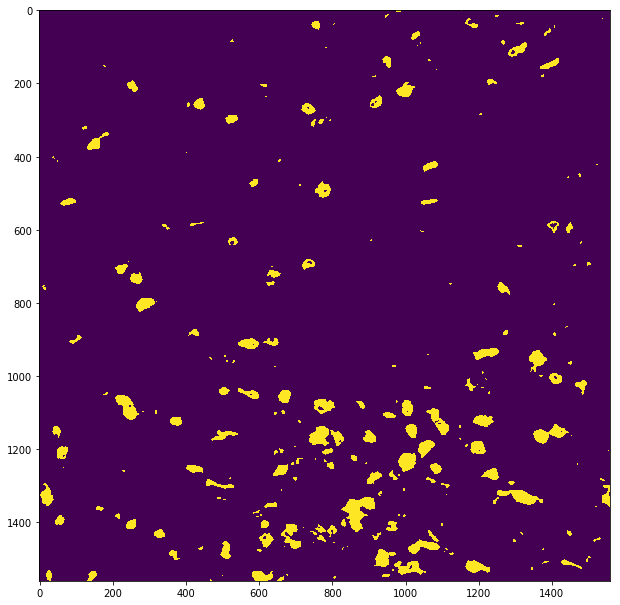

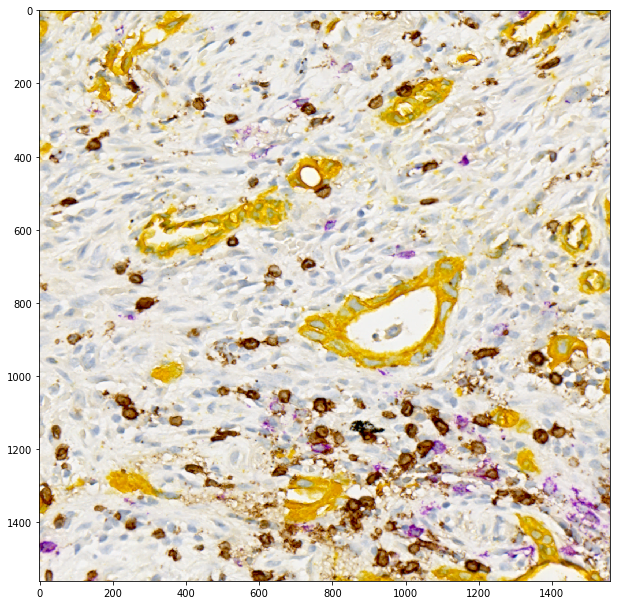

[['dice', 0.78220302154963062], ['Precision', 0.75349428208386282], ['Pc', 0.82909532328136981]]


In [52]:
# Show results

X,Y,W = dataset.get_X_Y_W(index=7,train=True)
Y_hat,crops = predict_full_image(unet,X)
cropsh,cropsw = crops

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10.5, 10.5,forward=True)

Yimg = from_categorical(np.expand_dims(Y,0))[0]

plt.imshow(Yimg[cropsh[0]:cropsh[1],cropsw[0]:cropsw[1]])
plt.show()


fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10.5, 10.5,forward=True)
plt.imshow(Y_hat[cropsh[0]:cropsh[1],cropsw[0]:cropsw[1]])
plt.show()

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10.5, 10.5,forward=True)
plt.imshow(X[cropsh[0]:cropsh[1],cropsw[0]:cropsw[1]]*stds + means)
plt.show()

dice_s = dice(Yimg[cropsh[0]:cropsh[1],cropsw[0]:cropsw[1]],Y_hat[cropsh[0]:cropsh[1],cropsw[0]:cropsw[1]])
precision_s = precision(Yimg[cropsh[0]:cropsh[1],cropsw[0]:cropsw[1]],Y_hat[cropsh[0]:cropsh[1],cropsw[0]:cropsw[1]])
Pc_s = Pc(Yimg[cropsh[0]:cropsh[1],cropsw[0]:cropsw[1]],Y_hat[cropsh[0]:cropsh[1],cropsw[0]:cropsw[1]])

table = [["dice",dice_s],
         ["Precision",precision_s],
         ["Pc",Pc_s]]
print(table)

# Mimo_Train

Training a UNET with basic paramters:

* input_h,iput_w = 450,450
* classes = 2
* targets = train_y, eval_y

In [ ]:
input_patch_size = [450,450] # input patch (expect output to be smaller)
input_channels = [3] # RGB
output_channels = [2] #cell and bkg
NBATCH = 5 # example patch per batch
EPCS = 1500 # epochs
REG = True # regularization
USEW = True # use weights
W = 10 # importance of weights
NAME_NET = 'Mimo_W100' # name for saving
JT = True # Just train set means no evaluation during training 

dataset_path = '../CD_Dataset'
trained_models_path = './trained_models'
NAME_NET = os.path.join(trained_models_path,NAME_NET)

In [ ]:
# Define your model
model_input_size = input_patch_size + input_channels
mimo = MimoNet(model_input_size, classes=output_channels[0], metrics=[dice_coef,precision], regularized=REG)
model_output_size = list(mimo.outputs_shape[0])
print("input size: {}\noutput_size: {}".format(model_input_size,model_output_size))

In [ ]:
# Train model
histo = train(mimo,dataset,n_batch=NBATCH,epochs=EPCS,just_train=JT,use_weights=USEW, W=W, name=NAME_NET)

In [ ]:
# Save model
mimo.save_model(NAME_NET)
eval_histo = np.array(histo[0])
train_histo = np.array(histo[1])
train_histo.dump(NAME_NET+'_train_histo.pkl')
eval_histo.dump(NAME_NET+'_eval_histo.pkl')

In [ ]:
# Load model
mimo = MimoNet(model_input_size, classes=output_channels[0], metrics=[dice_coef,precision], regularized=REG)
mimo.load_model(NAME_NET)
train_histo = np.load(NAME_NET+'_train_histo.pkl')
eval_histo = np.load(NAME_NET+'_eval_histo.pkl')

In [ ]:
# Show results

X,Y,W = dataset.get_X_Y_W(index=7,train=True)
Y_hat,crops = predict_full_image(mimo,X)
cropsh,cropsw = crops

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10.5, 10.5,forward=True)

Yimg = from_categorical(np.expand_dims(Y,0))[0]

plt.imshow(Yimg[cropsh[0]:cropsh[1],cropsw[0]:cropsw[1]])
plt.show()


fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10.5, 10.5,forward=True)
plt.imshow(Y_hat[cropsh[0]:cropsh[1],cropsw[0]:cropsw[1]])
plt.show()

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10.5, 10.5,forward=True)
plt.imshow(X[cropsh[0]:cropsh[1],cropsw[0]:cropsw[1]]*stds + means)
plt.show()

dice_s = dice(Yimg[cropsh[0]:cropsh[1],cropsw[0]:cropsw[1]],Y_hat[cropsh[0]:cropsh[1],cropsw[0]:cropsw[1]])
precision_s = precision(Yimg[cropsh[0]:cropsh[1],cropsw[0]:cropsw[1]],Y_hat[cropsh[0]:cropsh[1],cropsw[0]:cropsw[1]])
Pc_s = Pc(Yimg[cropsh[0]:cropsh[1],cropsw[0]:cropsw[1]],Y_hat[cropsh[0]:cropsh[1],cropsw[0]:cropsw[1]])

table = [["dice",dice_s],
         ["Precision",precision_s],
         ["Pc",Pc_s]]
print(table)